**Machine Learning Basic Principles 2018 - Data Analysis Project Report**

*All the text in italics is instructions for filling the template - remove when writing the project report!*

# *Title* 

*Title should be concise and informative, describes the approach to solve the problem. Some good titles from previous years:*

*- Comparing extreme learning machines and naive bayes’ classifier in spam detection*

*- Using linear discriminant analysis in spam detection*

*Some not-so-good titles:*

*- Bayesian spam filtering with extras*

*- Two-component classifier for spam detection*

*- CS-E3210 Term Project, final report*




## Abstract

*Precise summary of the whole report, previews the contents and results. Must be a single paragraph between 100 and 200 words.*



## 1. Introduction

*Background, problem statement, motivation, many references, description of
contents. Introduces the reader to the topic and the broad context within which your
research/project fits*

*- What do you hope to learn from the project?*
*- What question is being addressed?*
*- Why is this task important? (motivation)*

*Keep it short (half to 1 page).*



## 2. Data analysis

*Briefly describe data (class distribution, dimensionality) and how will it affect
classification. Visualize the data. Don’t focus too much on the meaning of the features,
unless you want to.*

*- Include histograms showing class distribution.*




In [1]:
'''
Dependencies
'''
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn import metrics as met
from sklearn.model_selection import train_test_split as TTSplit
from sklearn.metrics import classification_report as ClassRep
from sklearn.metrics import confusion_matrix as ConfMat
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn import preprocessing, svm, ensemble
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

/home/abdullah/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


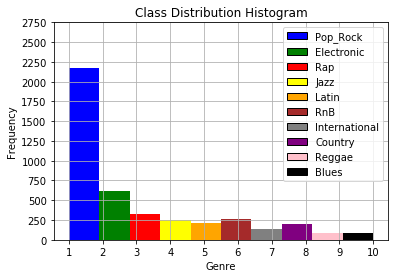

In [2]:
'''
Data Import from Files
'''

# Reading Data into Numpy Arrays
XTrainData = pd.read_csv("train_data.csv", header = None).values
YTrainData = pd.read_csv("train_labels.csv", header = None).values
XTestData = pd.read_csv("test_data.csv", header = None).values

# Storing Numpy Arrays into DataFrames for better visualization
FeatureTrainData = pd.DataFrame(XTrainData)
LabelTrainData = pd.DataFrame(YTrainData)
FeatureTestData = pd.DataFrame(XTestData)

#FeatureTrainData.head()
#FeatureTestData.head()
#LabelTrainData.head()

# Class Distribution Histogram 
fig, ax = plt.subplots()
N, bins, patches = ax.hist(YTrainData, linewidth = 2)
plt.title("Class Distribution Histogram")
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.grid(True)
plt.xticks(np.arange(1, 11, step = 1))
plt.yticks(np.arange(0, 3000, step = 250))
colors = ['blue', 'green', 'red', 'yellow', 'orange', 'brown', 'gray', 'purple', 'pink', 'black']
for i in range(0, 10):
    patches[i].set_facecolor(colors[i])
# Histogram Legend
handles = [Rectangle((0, 0), 1, 1, color = c, ec = "k") for c in colors]
labels = ["Pop_Rock", "Electronic", "Rap", "Jazz", "Latin", "RnB", "International", "Country", "Reggae", "Blues"]
plt.legend(handles, labels)
plt.show()

In [3]:
'''
Data Normalization (Choose one and comment out the others for testing)
'''

#Initialization of Scalers/Transformers/Normalizers
standard_scaler = preprocessing.StandardScaler()
min_max_scaler = preprocessing.MinMaxScaler()
robust_scaler = preprocessing.RobustScaler()
normalize = preprocessing.Normalizer()
quantile_transformer = preprocessing.QuantileTransformer(random_state = 0)


# Choice of Scaling/Transforming/Normalizing (Default = Standard Scaler)
choice = 1

if choice == 1: 
    # Normalize the data with standard
    XTrainData = standard_scaler.fit_transform(XTrainData)
    XTestData = standard_scaler.fit_transform(XTestData)
elif choice == 2:
    # Normalize the data with minmax
    XTrainData = min_max_scaler.fit_transform(XTrainData)
    XTestData = min_max_scaler.fit_transform(XTestData)
elif choice == 3:
    # Normalize the data with robust scaler
    XTrainData = robust_scaler.fit_transform(XTrainData)
    XTestData = robust_scaler.fit_transform(XTestData)
elif choice == 4:
    #Normalize the data with Normalize
    XTrainData = normalize.fit_transform(XTrainData)
    XTestData = normalize.fit_transform(XTestData)
else:
    # Scale data onto Uniform Distribution [0, 1]
    XTrainData = quantile_transformer.fit_transform(XTrainData)
    XTestData = quantile_transformer.fit_transform(XTestData)

'''
Data Splits (Test and Train Sets)
'''

# Multiple split ratios for test purposes 
splitRatios = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85]

# Splitting the Test Data into Training and Testing Sets (both Features and Labels) 
XTrainSet, XTestSet, YTrainSet, YTestSet = TTSplit(XTrainData, YTrainData, test_size = splitRatios[2])
Test_LabelSet_Size = len(YTestSet)
Train_LabelSet_Size = len(YTrainSet)

# Reshaping and preparing the training and testing sets. (R put with variable name (R = Refined)) 
# (Just re-shaped for now. To be refined later)
YTestR = np.reshape(YTestSet, (Test_LabelSet_Size, 1))
YTrainR = np.reshape(YTrainSet, (Train_LabelSet_Size, 1))

In [4]:
''' 
Multinomial Logistic Regression with Multiple Iterations
PARAMETERS:
    Iterations = 7500
    Inverse Regularization Constant = 0.1 till 10
    Solver = SAG
    Penalty = L2
'''

C = 0.1
testAcc = []
validAcc = []
C_array = []

while C < 2:
    logreg = LogReg(C = C, max_iter = 7500, solver ='sag', multi_class = 'multinomial', n_jobs = -2)

    # Fitting the refined training sets 
    logreg.fit(XTrainSet, YTrainR.ravel())

    # Calculation of training accuracy
    predictTest = logreg.predict(XTestSet)
    predictTrain = logreg.predict(XTrainSet)

    # Display the calculated accuracies
    print('Inverse of Regularization Constant (C): ', C)
    print('Training Accuracy: ', met.accuracy_score(predictTrain, YTrainR))
    print('Testing Accuracy: ', met.accuracy_score(predictTest, YTestR))
    testAcc.append(met.accuracy_score(predictTrain, YTrainR))
    validAcc.append(met.accuracy_score(predictTest, YTestR))
    C_array.append(C)
    
    # Display final score from Logistic Regression
    score = logreg.score(XTestSet, YTestSet)
    print('Final Score: ', score, '\n')
    
    # Increment C for next iteration
    C = C * 2


Inverse of Regularization Constant (C):  0.1
Training Accuracy:  0.8440366972477065
Testing Accuracy:  0.623240589198036
Final Score:  0.623240589198036 

Inverse of Regularization Constant (C):  0.2
Training Accuracy:  0.8715596330275229
Testing Accuracy:  0.613747954173486
Final Score:  0.613747954173486 

Inverse of Regularization Constant (C):  0.4
Training Accuracy:  0.8998470948012233
Testing Accuracy:  0.5934533551554828
Final Score:  0.5934533551554828 

Inverse of Regularization Constant (C):  0.8
Training Accuracy:  0.9281345565749235
Testing Accuracy:  0.5842880523731587
Final Score:  0.5842880523731587 

Inverse of Regularization Constant (C):  1.6
Training Accuracy:  0.9510703363914373
Testing Accuracy:  0.5669394435351882
Final Score:  0.5669394435351882 



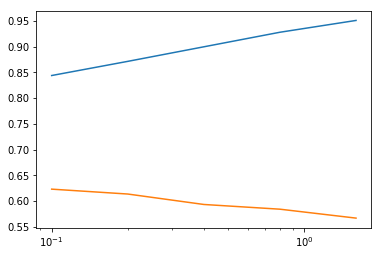

In [5]:
'''
Accuracy Plot for multiple Multinomial Logistic Regression Classifications
'''
plt.figure()
plt.plot(C_array,testAcc)
plt.plot(C_array,validAcc)
plt.xscale('log')
plt.show()

In [6]:
# Trial runs of all relevant Classifiers on the data (for test purposes)

''' 
Gradient Boosting Classifier on the data
    Default Settings
'''

'''
gbc = ensemble.GradientBoostingClassifier()
gbc.fit(XTrainSet, YTrainR.ravel())
predictTest = gbc.predict(XTestSet)
predictTrain = gbc.predict(XTrainSet)
score = gbc.score(XTestSet, YTestSet)
print('Training Accuracy: ', met.accuracy_score(predictTrain, YTrainR))
print('Testing Accuracy: ', met.accuracy_score(predictTest, YTestR))
print('Final Score: ', score, '\n')
'''



''' 
Random Forest Classifier on the data
    Default Settings
'''
'''
rfc = ensemble.RandomForestClassifier()
rfc.fit(XTrainSet, YTrainR.ravel())
predictTest = rfc.predict(XTestSet)
predictTrain = rfc.predict(XTrainSet)
score = rfc.score(XTestSet, YTestSet)
print('Training Accuracy: ', met.accuracy_score(predictTrain, YTrainR))
print('Testing Accuracy: ', met.accuracy_score(predictTest, YTestR))
print('Final Score: ', score, '\n')
'''


''' 
RBF SVM Classifier on the data
    Default Settings
'''

'''
rbfsvm = svm.SVC()
rbfsvm.fit(XTrainSet, YTrainR.ravel())
predictTest = rbfsvm.predict(XTestSet)
predictTrain = rbfsvm.predict(XTrainSet)
score = rbfsvm.score(XTestSet, YTestSet)
print('Training Accuracy: ', met.accuracy_score(predictTrain, YTrainR))
print('Testing Accuracy: ', met.accuracy_score(predictTest, YTestR))
print('Final Score: ', score, '\n')
'''

"\nrbfsvm = svm.SVC()\nrbfsvm.fit(XTrainSet, YTrainR.ravel())\npredictTest = rbfsvm.predict(XTestSet)\npredictTrain = rbfsvm.predict(XTrainSet)\nscore = rbfsvm.score(XTestSet, YTestSet)\nprint('Training Accuracy: ', met.accuracy_score(predictTrain, YTrainR))\nprint('Testing Accuracy: ', met.accuracy_score(predictTest, YTestR))\nprint('Final Score: ', score, '\n')\n"

In [7]:
'''
Single Multinomial Logistic Regression Classification
'''

logreg = LogReg(C = 1.85, max_iter = 7500, solver ='sag', multi_class = 'multinomial', n_jobs = -2)
logreg.fit(XTrainSet, YTrainSet.ravel())
predictTrain = logreg.predict(XTrainSet)
print('Training Accuracy: ', met.accuracy_score(predictTrain, YTrainSet))

Training Accuracy:  0.9564220183486238


In [8]:
# Write results to excel file for analysis
writer = pd.ExcelWriter('logreg.xlsx', engine = 'xlsxwriter')
pd.DataFrame(logreg.predict(XTestData)).to_excel(writer, sheet_name = 'accuracy')
pd.DataFrame(logreg.predict_proba(XTestData)).to_excel(writer, sheet_name = 'logloss')
writer.save()

In [9]:
''' 
KNN Classifier Testing with Mutiple Iterations
'''

k_array = []
acc = []
for k in range(50):
    neigh = KNeighborsClassifier(n_neighbors=k+1, n_jobs = -2)
    neigh.fit(XTrainSet, YTrainSet.ravel())
    predLabels = neigh.predict(XTestSet)
    conf = confusion_matrix(YTestSet, predLabels)
    accuracy = np.trace(conf)/np.sum(conf)
    k_array.append(k+1)
    acc.append(accuracy)
    print('Accuracy:', accuracy,'with', k+1, 'neighbors')


Accuracy: 0.46055646481178397 with 1 neighbors
Accuracy: 0.5273322422258593 with 2 neighbors
Accuracy: 0.5414075286415712 with 3 neighbors
Accuracy: 0.5525368248772504 with 4 neighbors
Accuracy: 0.5541734860883797 with 5 neighbors
Accuracy: 0.5577741407528641 with 6 neighbors
Accuracy: 0.5554828150572831 with 7 neighbors
Accuracy: 0.5590834697217676 with 8 neighbors
Accuracy: 0.5541734860883797 with 9 neighbors
Accuracy: 0.5617021276595745 with 10 neighbors
Accuracy: 0.5571194762684124 with 11 neighbors
Accuracy: 0.5620294599018003 with 12 neighbors
Accuracy: 0.5620294599018003 with 13 neighbors
Accuracy: 0.5633387888707038 with 14 neighbors
Accuracy: 0.5662847790507365 with 15 neighbors
Accuracy: 0.5666121112929624 with 16 neighbors
Accuracy: 0.5682487725040917 with 17 neighbors
Accuracy: 0.5682487725040917 with 18 neighbors
Accuracy: 0.5675941080196399 with 19 neighbors
Accuracy: 0.5666121112929624 with 20 neighbors
Accuracy: 0.5705400981996727 with 21 neighbors
Accuracy: 0.570540098

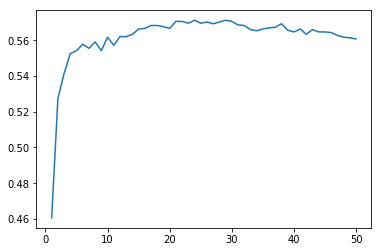

In [10]:
'''
Accuracy Plot for multiple KNN Classifications
'''

plt.figure()
plt.plot(k_array, acc)
plt.show()

In [12]:
'''
Single KNN Classification
'''

neigh = KNeighborsClassifier(n_neighbors=20, n_jobs = -2)
neigh.fit(XTrainSet, YTrainSet.ravel())
predLabels = neigh.predict(XTestSet)
conf = confusion_matrix(YTestSet, predLabels)
accuracy = np.trace(conf)/np.sum(conf)
print('Accuracy:', accuracy)
logloss = neigh.predict_proba(XTestSet)

Accuracy: 0.5666121112929624


In [13]:
# Write results to excel file for analysis
writer = pd.ExcelWriter('kneigh.xlsx', engine = 'xlsxwriter')
pd.DataFrame(neigh.predict(XTestData)).to_excel(writer, sheet_name = 'accuracy')
pd.DataFrame(neigh.predict_proba(XTestData)).to_excel(writer, sheet_name = 'logloss')
writer.save()

In [ ]:
#UNTESTED
def logLoss(probabilities):
    probabilities = probabilities / np.sum(probabilities, axis = 1) #normalize sums of probabilities to 1
    classes = np.argmax(probabilities, axis = 1)
    logsum = 0
    for i in range(probabilities.shape[0]):
        logsum += np.log(probabilities[i,classes[i]])
    return logsum/probabilities.shape[0]

In [ ]:
# Load the data and cleanup

In [ ]:
#Analysis of the input data
# ...

## 3. Methods and experiments

*- Explain your whole approach (you can include a block diagram showing the steps in your process).* 

*- What methods/algorithms, why were the methods chosen. *

*- What evaluation methodology (cross CV, etc.).*



In [ ]:
# Trials with ML algorithms

## 4. Results

*Summarize the results of the experiments without discussing their implications.*

*- Include both performance measures (accuracy and LogLoss).*

*- How does it perform on kaggle compared to the train data.*

*- Include a confusion matrix.*



In [ ]:
#Confusion matrix ...

## 5. Discussion/Conclusions

*Interpret and explain your results *

*- Discuss the relevance of the performance measures (accuracy and LogLoss) for
imbalanced multiclass datasets. *

*- How the results relate to the literature. *

*- Suggestions for future research/improvement. *

*- Did the study answer your questions? *



## 6. References

*List of all the references cited in the document*

## Appendix
*Any additional material needed to complete the report can be included here. For example, if you want to keep  additional source code, additional images or plots, mathematical derivations, etc. The content should be relevant to the report and should help explain or visualize something mentioned earlier. **You can remove the whole Appendix section if there is no need for it.** *